# House Prices - Advanced Regression Techniques

<img src="https://assets.weforum.org/article/image/large_15gAQdddPzO5Cn18bJ--4zQTUHrfpVxWQbAQ6jhvTSc.jpg" alt="House Image" width="500"/>


This Jupyter Notebook contains the analysis and modeling of the House Prices - Advanced Regression Techniques dataset from Kaggle. In this project, we explore the dataset, perform data preprocessing, conduct exploratory data analysis (EDA), and build regression models to predict house prices.

## Table of Contents

1. [Introduction](#introduction)
2. [Data Preprocessing](#data-preprocessing)
    1. [Exploring the Data](#exploring-the-data)
    2. [Feature Selection](#feature-selection)
    3. [Handling Missing Data](#handling-missing-data)
3. [Exploratory Data Analysis (EDA)](#eda)
    1. [Univariate Analysis](#univariate-analysis)
    2. [Bivariate Analysis](#bivariate-analysis)
4. [Feature Engineering](#feature-engineering)
    1. [Handling Outliers](#handling-outliers)
    2. [Handling Categorical Data](#handling-categorical-data)
5. [Data Splitting and Scaling](#data-splitting-and-scaling)
6. [Model Selection](#model-selection)
    1. [Linear Regression](#linear-regression)
    2. [Random Forest Regression](#random-forest-regression)
    3. [Gradient Boosting Regression](#gradient-boosting-regression)
    4. [Partial Least Squares Regression](#partial-least-squares-regression)
    5. [Support Vector Regression](#support-vector-regression)
    6. [Ridge Regression](#ridge-regression)
    7. [XGBoost](#xgboost)
7. [Model Evaluation](#model-evaluation)
8. [Conclusion](#conclusion)


## Introduction <a class="anchor" id="introduction"></a>

The dataset contains various features related to residential properties, including information such as crime rates, land zoning, house characteristics, and more. The goal of this project is to predict the sale prices of houses based on these features. This project marks my first foray into the world of EDA. 

To achieve this, we will follow these steps:

- Data preprocessing to handle missing values and prepare the data.
- Exploratory data analysis to gain insights into the dataset.
- Feature engineering to create or transform features for model building.
- Building regression models to predict house prices.
- Evaluating model performance and selecting the best model.

Let's get started!

## Data Preprocessing <a class="anchor" id="data-preprocessing"></a>

Data preprocessing is a critical phase in preparing the dataset for analysis and modeling. It involves several key steps:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('house_prices.csv')

### Exploring the Data <a class="anchor" id="exploring-the-data"></a>
Explore the dataset to gain an initial understanding of its structure and content. Check the data's dimensions, review the column names, and examine the first few rows to get a sense of the data's format.


In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

### Feature Selection <a class="anchor" id="feature-selection"></a>
Decide on the features (columns) to include in your analysis. Feature selection aims to choose the most relevant and informative attributes for your modeling task. You might exclude irrelevant columns or ones with high multicollinearity.

In [9]:
features = ['LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt',
            'BsmtQual', 'GarageArea', 'SalePrice']

df = df[features]
df.head()

,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,OverallCond,YearBuilt,BsmtQual,GarageArea,SalePrice
0,65.0,8450,Reg,CollgCr,7,5,2003,Gd,548,208500
1,80.0,9600,Reg,Veenker,6,8,1976,Gd,460,181500
2,68.0,11250,IR1,CollgCr,7,5,2001,Gd,608,223500
3,60.0,9550,IR1,Crawfor,7,5,1915,TA,642,140000
4,84.0,14260,IR1,NoRidge,8,5,2000,Gd,836,250000


In [10]:
df.shape

(1460, 10)

In [11]:
df.skew()

C:\Users\Burak\AppData\Local\Temp\ipykernel_12088\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


LotFrontage     2.163569
LotArea        12.207688
OverallQual     0.216944
OverallCond     0.693067
YearBuilt      -0.613461
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

In [12]:
df.duplicated().sum()

0

### Handling Missing Data<a class="anchor" id="handling-missing-data"></a>
Identify and handle missing data. Depending on the extent of missing values, you can choose to impute missing data using strategies like mean or median imputation, drop rows or columns with missing values, or employ more advanced imputation techniques.


In [13]:
df.isnull().sum()

LotFrontage     259
LotArea           0
LotShape          0
Neighborhood      0
OverallQual       0
OverallCond       0
YearBuilt         0
BsmtQual         37
GarageArea        0
SalePrice         0
dtype: int64

In [14]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)
df.dropna(axis = 0, inplace = True)
df.shape

(1423, 10)

In [15]:
df.isnull().sum()

LotFrontage     0
LotArea         0
LotShape        0
Neighborhood    0
OverallQual     0
OverallCond     0
YearBuilt       0
BsmtQual        0
GarageArea      0
SalePrice       0
dtype: int64

These initial steps lay the foundation for a clean and well-prepared dataset, setting the stage for exploratory data analysis (EDA) and subsequent machine learning modeling.


## Exploratory Data Analysis (EDA) <a class = "anchor" id="eda"></a>

In this section, we dive into Exploratory Data Analysis (EDA), a crucial phase in understanding our dataset's characteristics and relationships. The EDA process helps us uncover insights and patterns that inform our modeling and decision-making.


### Univariate Analysis<a class="anchor" id="univariate-analysis"></a>
#### Histograms
To gain a sense of the data's distribution, we begin with histograms. These plots reveal the frequency distribution of each feature and the target variable, SalePrice. Histograms help us identify data skewness, central tendencies, and potential outliers.

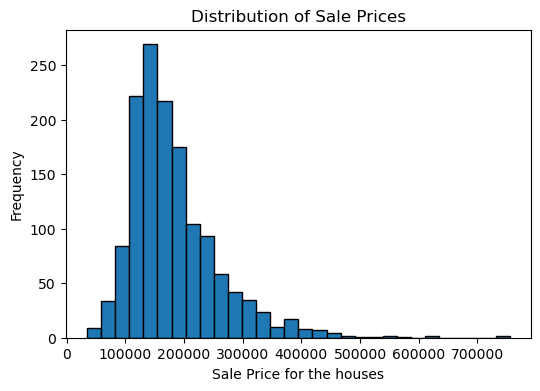

In [16]:
# Set a smaller figure size
plt.figure(figsize=(6, 4))

# Create a histogram for a feature
plt.hist(df["SalePrice"], bins=30, edgecolor="k")
plt.xlabel("Sale Price for the houses")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Prices")
plt.show()

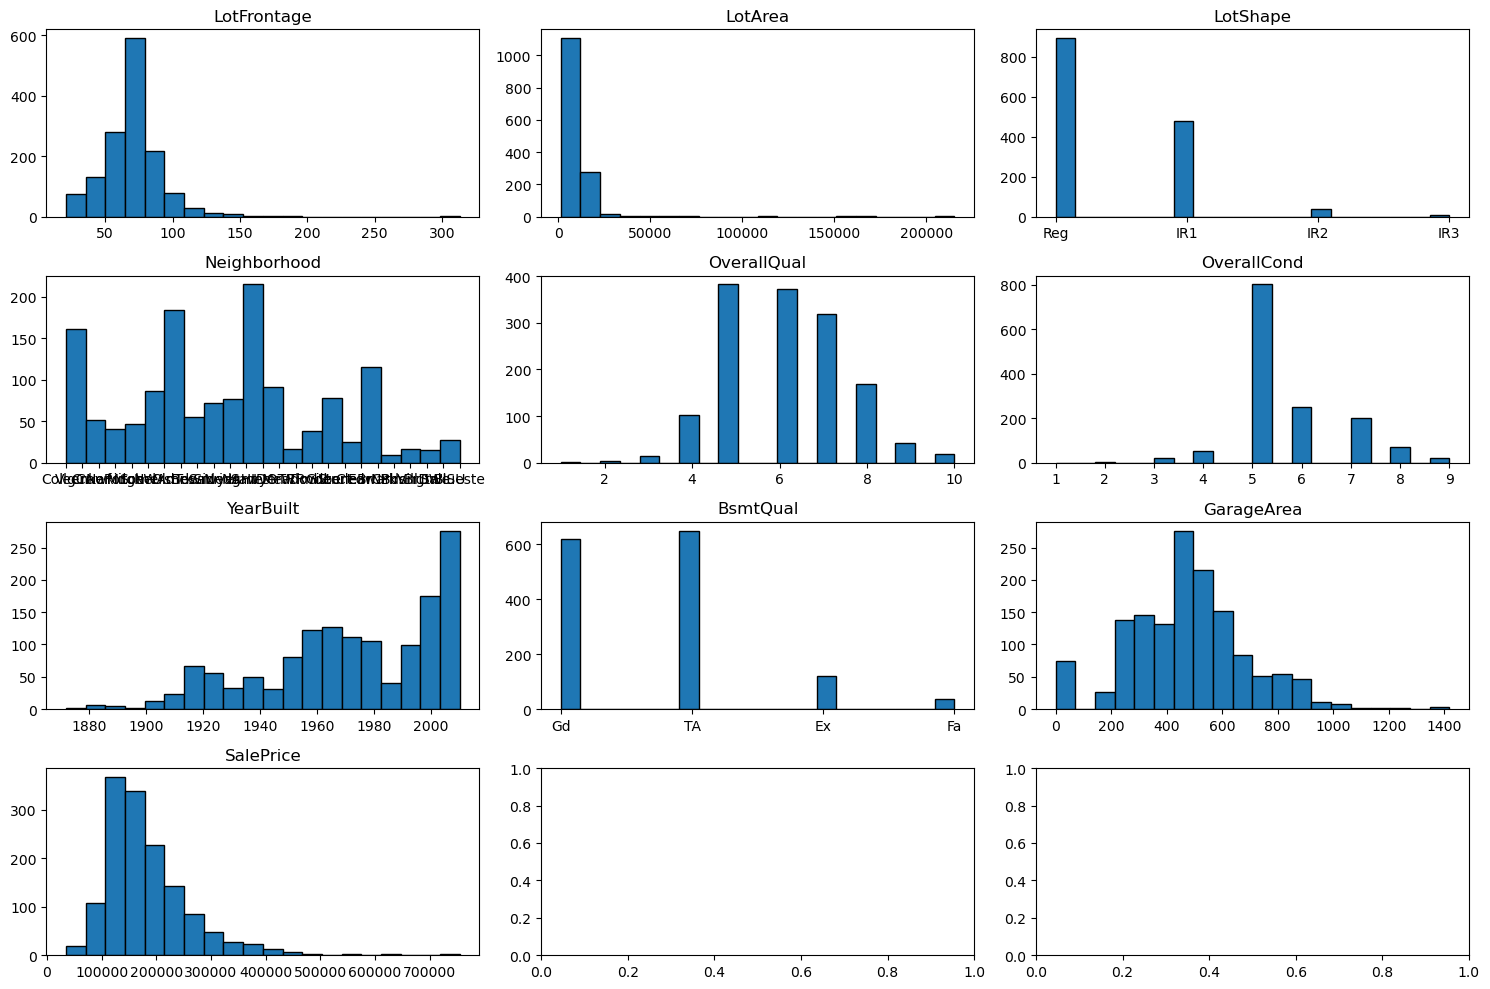

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Create histograms for multiple features in subplots
for col, ax in zip(df.columns, axes.flatten()):
    ax.hist(df[col], bins=20, edgecolor="k")
    ax.set_title(col)

plt.tight_layout()
plt.show()

#### Boxplots
Next, we examine boxplots to detect outliers in our dataset. Boxplots provide a visual representation of the data's spread and can reveal extreme values that might require special handling during data preprocessing.

In the subsequent sections, we'll delve deeper into feature engineering, modeling, and evaluation, building on the insights gained during the EDA phase.

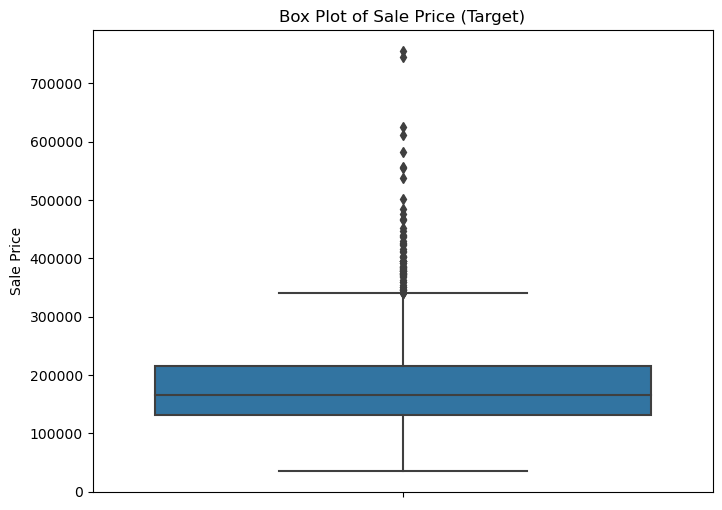

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, y="SalePrice")
plt.ylabel("Sale Price")
plt.title("Box Plot of Sale Price (Target)")
plt.show()

For Sale Prices, higher values can be explained as luxury houses etc. So, for outlier detection i continue with the other features.

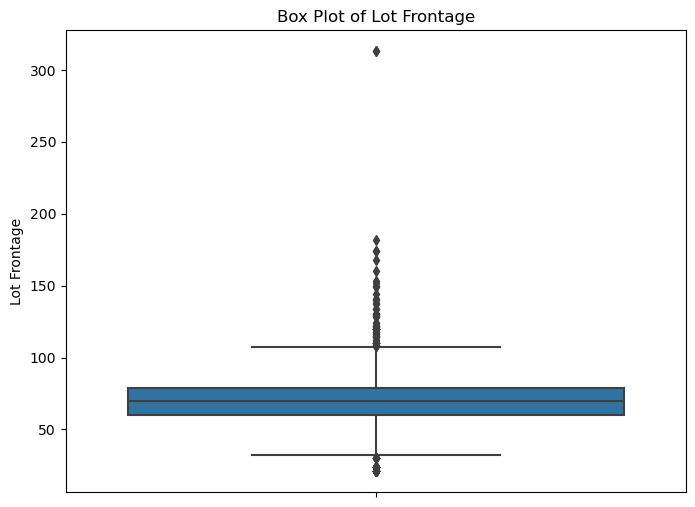

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, y="LotFrontage")
plt.ylabel("Lot Frontage")
plt.title("Box Plot of Lot Frontage")
plt.show()

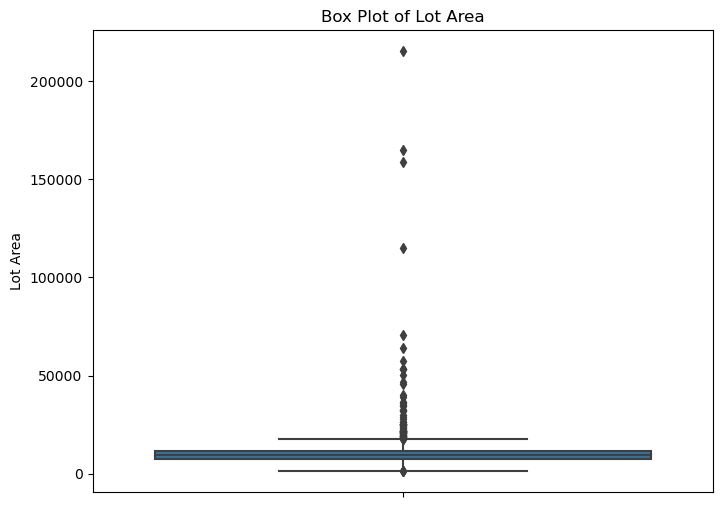

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, y="LotArea")
plt.ylabel("Lot Area")
plt.title("Box Plot of Lot Area")
plt.show()

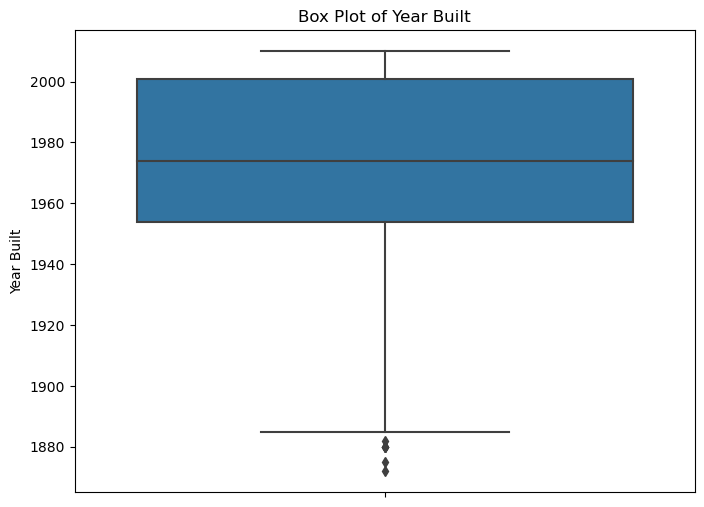

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, y="YearBuilt")
plt.ylabel("Year Built")
plt.title("Box Plot of Year Built")
plt.show()

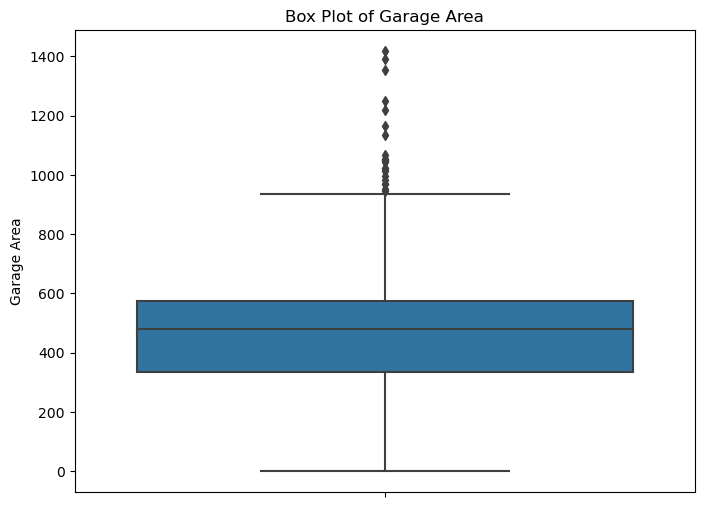

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, y="GarageArea")
plt.ylabel("Garage Area")
plt.title("Box Plot of Garage Area")
plt.show()

### Bivariate Analysis<a class="anchor" id="bivariate-analysis"></a>

#### Correlation Matrix
The correlation matrix analysis is a valuable tool for understanding the relationships between variables. It helps us identify how features correlate with each other and with the target variable, SalePrice. This analysis can provide insights into potential predictor variables for our regression models.

C:\Users\Burak\AppData\Local\Temp\ipykernel_12088\108737707.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


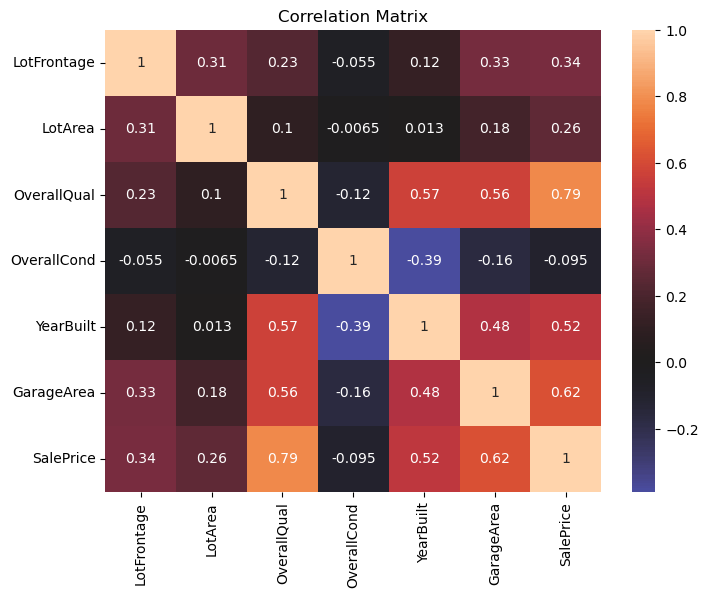

In [23]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, center=0)
plt.title("Correlation Matrix")
plt.show()

All the features except Overall Condition is correlated with the target feature

#### Scatter Plots
For bivariate analysis, we've created scatter plots that visualize the relationship between each feature and SalePrice. These plots allow us to assess whether there are linear or non-linear associations between individual features and the target variable. They help us identify trends and potential predictors.

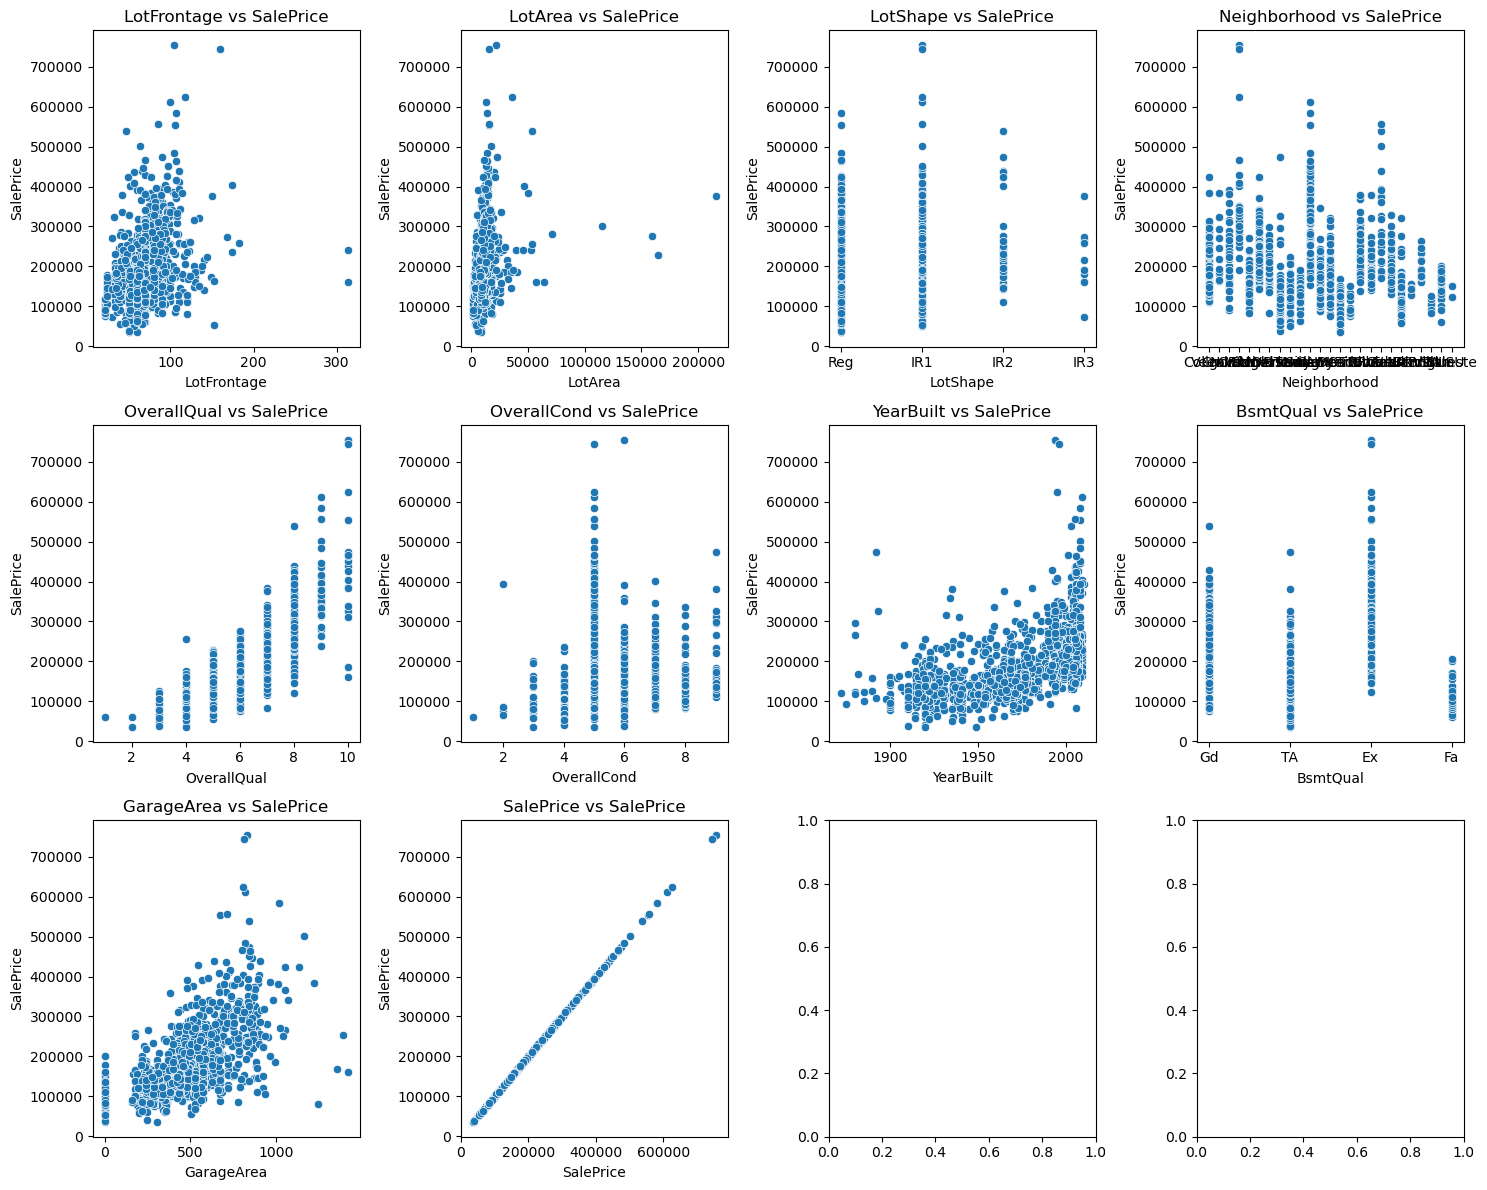

In [24]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing between subplots

# Create scatter plots for each feature vs SalePrice
for feature, ax in zip(features, axes.flatten()):
    sns.scatterplot(x=feature, y="SalePrice", data=df, ax=ax)
    ax.set_title(f"{feature} vs SalePrice")

plt.tight_layout()
plt.show()

## Feature Engineering <a class="anchor" id="feature-engineering"></a>

Feature engineering is a crucial step in our data preparation process, aimed at creating informative, model-ready features from the raw dataset. In this section, we will explore various techniques to enhance our feature set, ensuring that it not only captures meaningful information but also aligns with the requirements of our machine learning models.

### Handling Outliers <a class="anchor" id="handling-outliers"></a>
We've also addressed outliers, which can skew model predictions. By identifying and addressing extreme values, we've improved the robustness of our models.

In [25]:
features_to_process = ['LotFrontage', 'LotArea', 'YearBuilt', 'GarageArea']

for feature in features_to_process:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

df.shape

(1235, 10)

### Handling Categorical Data<a class="anchor" id="handling-categorical-data"></a>
We've carefully addressed categorical variables using one-hot encoding and target encoding. One-hot encoding creates binary columns for each category, while target encoding leverages information from the target variable to represent categorical data numerically.

In [26]:
df.dtypes

LotFrontage     float64
LotArea           int64
LotShape         object
Neighborhood     object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
BsmtQual         object
GarageArea        int64
SalePrice         int64
dtype: object

In [27]:
df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

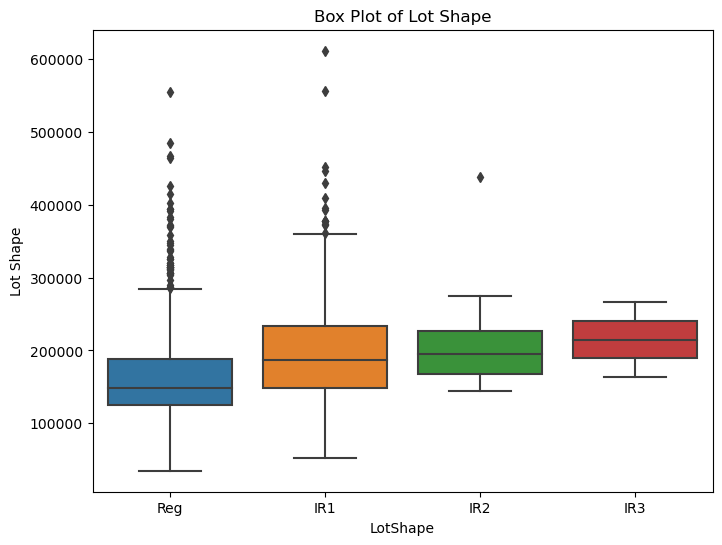

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'LotShape', y='SalePrice', data = df)
plt.ylabel("Lot Shape")
plt.title("Box Plot of Lot Shape")
plt.show()

While examine LotShape it can be said that IR2 is more consistent because it has less outliers and it can be said that IR3 has not enough data. So I will group IR2 and IR3.

In [29]:
# Group "IR2" and "IR3" categories into a new category "IR2_IR3"
df['LotShape'] = df['LotShape'].replace(['IR2', 'IR3'], 'IR2_IR3')

# Perform one-hot encoding as before
df = pd.get_dummies(df, columns=['LotShape'], prefix=['LotShape'], drop_first=True)
df.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,BsmtQual,GarageArea,SalePrice,LotShape_IR2_IR3,LotShape_Reg
0,65.0,8450,CollgCr,7,5,2003,Gd,548,208500,0,1
1,80.0,9600,Veenker,6,8,1976,Gd,460,181500,0,1
2,68.0,11250,CollgCr,7,5,2001,Gd,608,223500,0,0
3,60.0,9550,Crawfor,7,5,1915,TA,642,140000,0,0
4,84.0,14260,NoRidge,8,5,2000,Gd,836,250000,0,0


In [30]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Gilbert', 'StoneBr', 'ClearCr',
       'Edwards', 'NPkVill', 'Timber', 'Blmngtn', 'SWISU'], dtype=object)

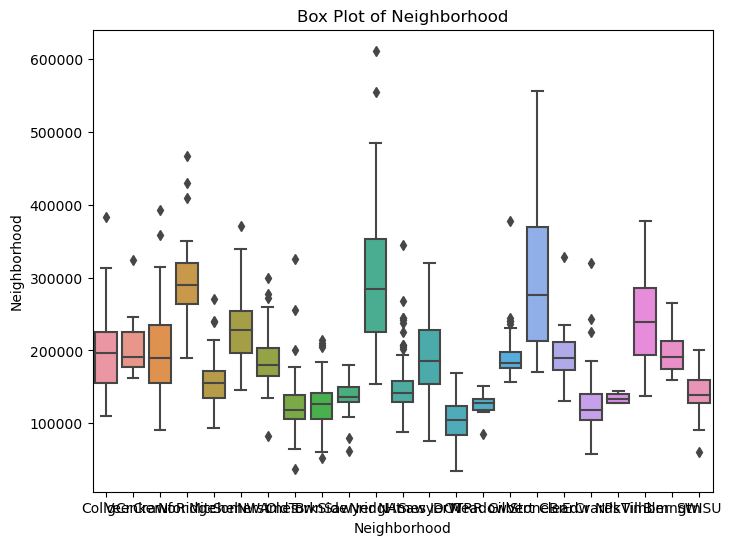

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'Neighborhood', y='SalePrice', data = df)
plt.ylabel("Neighborhood")
plt.title("Box Plot of Neighborhood")
plt.show()

There are lots of uniques for this data so i will do target encoding.

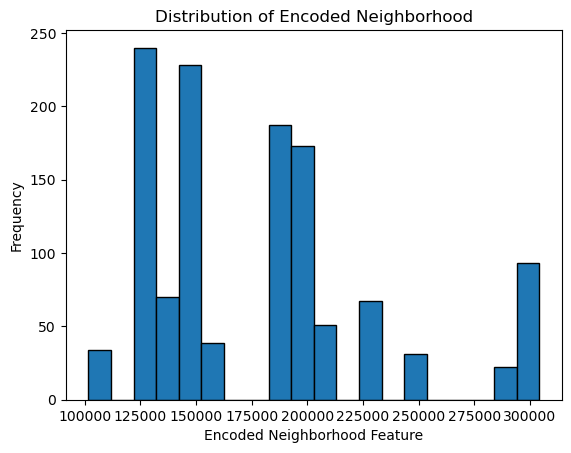

In [32]:
# Calculate mean SalePrice for each neighborhood
neighborhood_mean = df.groupby('Neighborhood')['SalePrice'].mean()

# Map the mean values to the 'Neighborhood' column
df['Neighborhood_encoded'] = df['Neighborhood'].map(neighborhood_mean)
df.drop('Neighborhood', axis=1, inplace=True)

# Print the head to check the updated column
plt.hist(df["Neighborhood_encoded"], bins=20, edgecolor="k")
plt.xlabel("Encoded Neighborhood Feature")
plt.ylabel("Frequency")
plt.title("Distribution of Encoded Neighborhood")
plt.show()

In [33]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

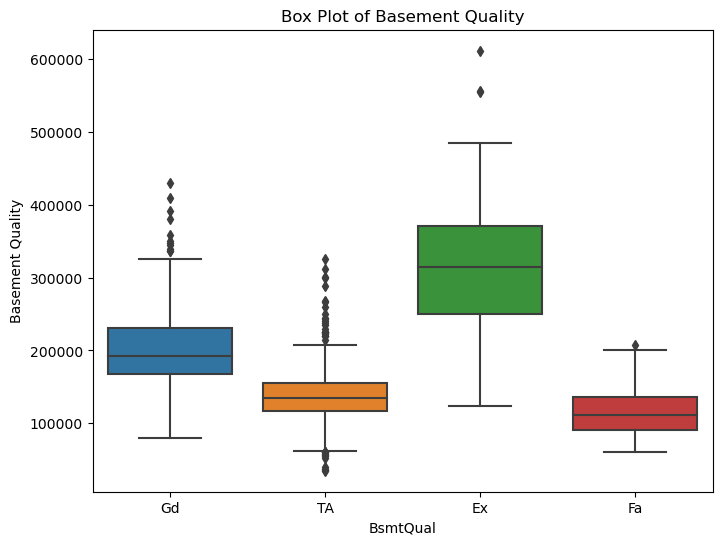

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'BsmtQual', y='SalePrice', data = df)
plt.ylabel("Basement Quality")
plt.title("Box Plot of Basement Quality")
plt.show()

For basement quality it can be said that Ex and Fa is more consistent than TA and Gd. All the features have enough data i will encode them for further model.

In [35]:
# Perform one-hot encoding as before
df = pd.get_dummies(df, columns=['BsmtQual'], prefix=['BsmtQual'], drop_first=True)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,GarageArea,SalePrice,LotShape_IR2_IR3,LotShape_Reg,Neighborhood_encoded,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,65.0,8450,7,5,2003,548,208500,0,1,197183.678322,0,1,0
1,80.0,9600,6,8,1976,460,181500,0,1,209687.500000,0,1,0
2,68.0,11250,7,5,2001,608,223500,0,0,197183.678322,0,1,0
3,60.0,9550,7,5,1915,642,140000,0,0,203017.139535,0,0,1
4,84.0,14260,8,5,2000,836,250000,0,0,299836.774194,0,1,0


Now i will modify the target as the last position in the dataframe

In [36]:
target = df.pop('SalePrice')
df.insert(12, target.name, target)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,GarageArea,LotShape_IR2_IR3,LotShape_Reg,Neighborhood_encoded,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,SalePrice
0,65.0,8450,7,5,2003,548,0,1,197183.678322,0,1,0,208500
1,80.0,9600,6,8,1976,460,0,1,209687.500000,0,1,0,181500
2,68.0,11250,7,5,2001,608,0,0,197183.678322,0,1,0,223500
3,60.0,9550,7,5,1915,642,0,0,203017.139535,0,0,1,140000
4,84.0,14260,8,5,2000,836,0,0,299836.774194,0,1,0,250000


Through these feature engineering techniques, we've transformed our dataset into a more suitable format for machine learning. These prepared features will serve as the foundation for training and evaluating our regression models in the subsequent sections.

## Data Splitting and Scaling <a class="anchor" id="data-splitting-and-scaling"></a>

To ensure the robustness of our machine learning models, we divide our dataset into two distinct subsets: a training set and a testing set. This division helps us evaluate how well our models generalize to unseen data. Our splitting ratio is 80/20. By keeping the testing data separate, we avoid model overfitting and obtain reliable performance metrics.


In [37]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting subsets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (988, 12)
X_test shape: (247, 12)
y_train shape: (988,)
y_test shape: (247,)


Data scaling is a crucial preprocessing step that brings all our features to a consistent scale. Scaling helps improve model convergence and ensures fair treatment for all features, contributing to the model's overall performance.

In [38]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

In [39]:
def draw_actual_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual SalePrice')
    plt.ylabel('Predicted SalePrice')
    plt.title(f'Prediction vs. Actual Plot for {model_name}')
    plt.show()

def draw_residual(y_test, y_pred, model_name):
    residuals = y_test - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted SalePrice')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {model_name}')
    plt.show()

## Model Selection <a class="anchor" id="model-selection"></a>
In the heart of our data-driven journey lies the development and deployment of predictive models. Our goal is to build accurate and reliable models capable of estimating house prices based on the dataset's features. This section outlines the key steps involved in constructing and evaluating these regression models.

To ensure robust model evaluation, we split our dataset into training and testing subsets. The training data is used to teach our models to capture the underlying patterns in the data, while the testing data remains unseen until evaluation. Our splitting ratio is 80/20 employed to strike a balance between training and evaluation.

### Linear Regression <a class="anchor" id="linear-regression"></a>

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred_lr = lr_model.predict(X_test)

mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE: 0.3021685576058095
MSE: 0.1964794741971834
RMSE: 0.4432600525619057


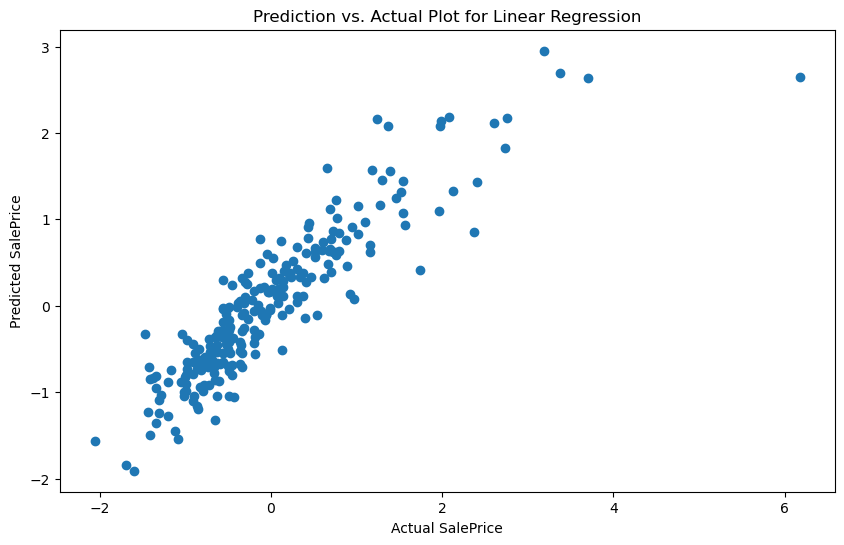

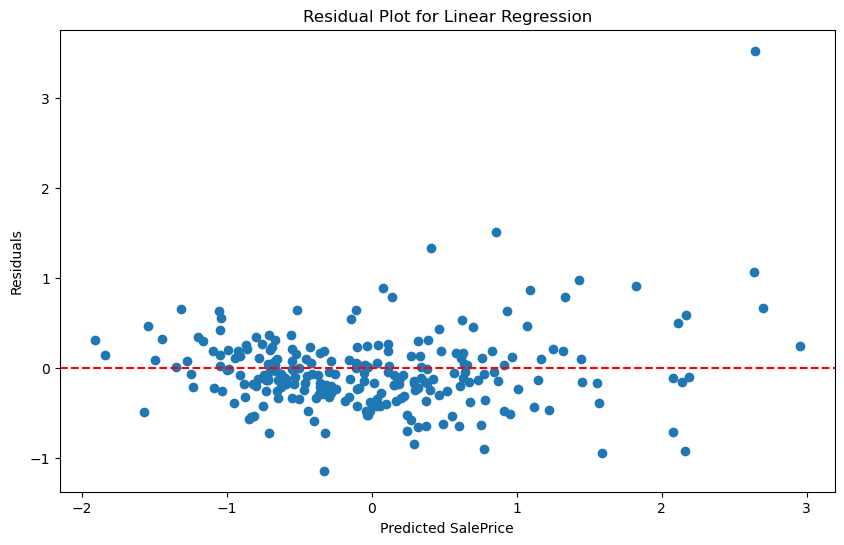

In [41]:
draw_actual_predicted(y_test, y_pred_lr, 'Linear Regression')
draw_residual(y_test, y_pred_lr, 'Linear Regression')

### Random Forest Regression <a class="anchor" id="random-forest-regression"></a>

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train, y_train.ravel())

# Make predictions on the scaled test data
y_pred_rf = rf_model.predict(X_test)

mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 0.28635834731053245
MSE: 0.16615590138012645
RMSE: 0.40762225329356894


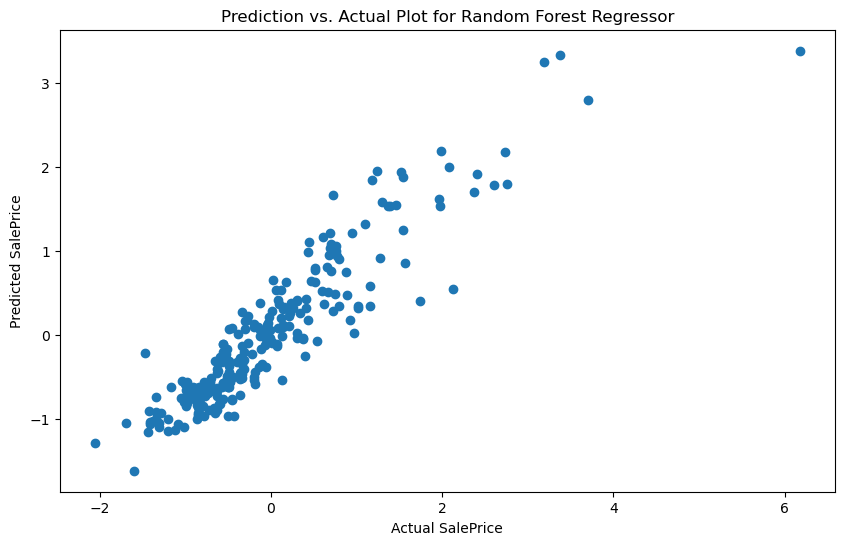

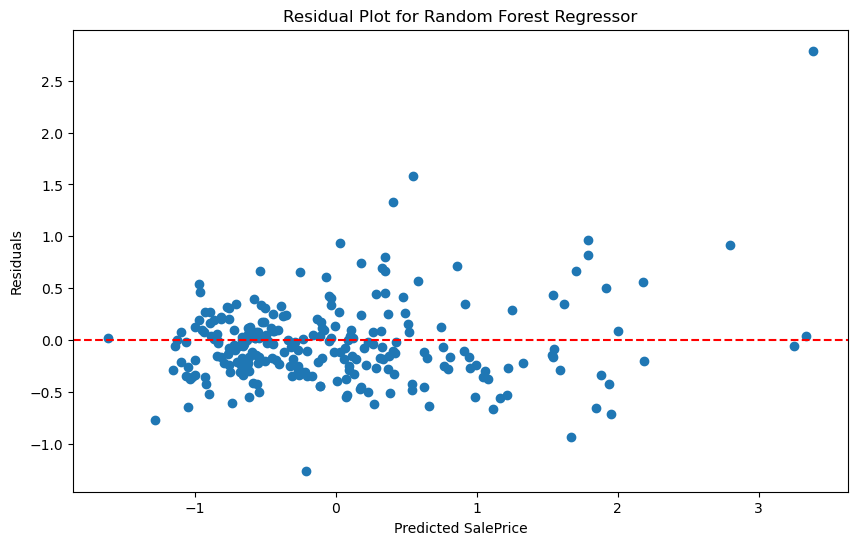

In [43]:
draw_actual_predicted(y_test.ravel(), y_pred_rf, 'Random Forest Regressor')
draw_residual(y_test.ravel(), y_pred_rf, 'Random Forest Regressor')

### Gradient Boosting Regression <a class="anchor" id="gradient-boosting-regression"></a>

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the scaled training data
gb_model.fit(X_train, y_train.ravel())

# Make predictions on the scaled test data
y_pred_gb = gb_model.predict(X_test)

mse_gb = metrics.mean_squared_error(y_test, y_pred_gb)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)))

MAE: 0.28418552377515316
MSE: 0.15978941265219646
RMSE: 0.39973667914290334


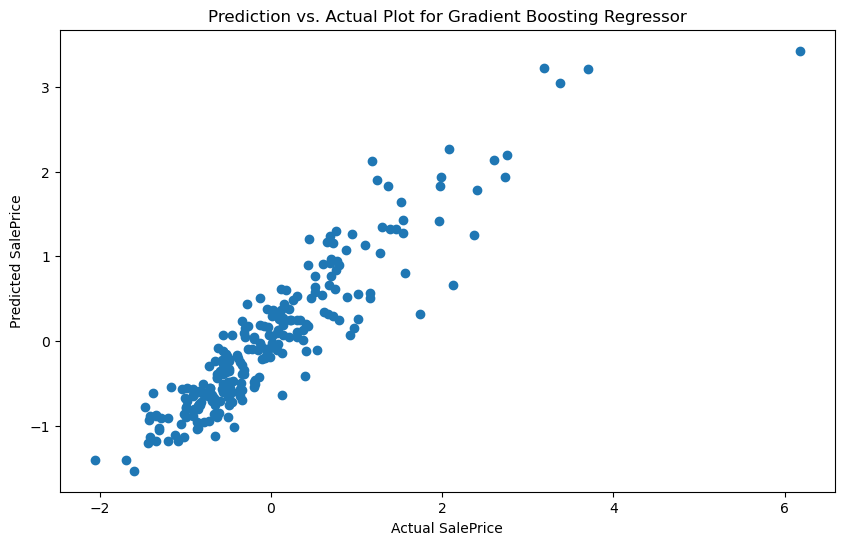

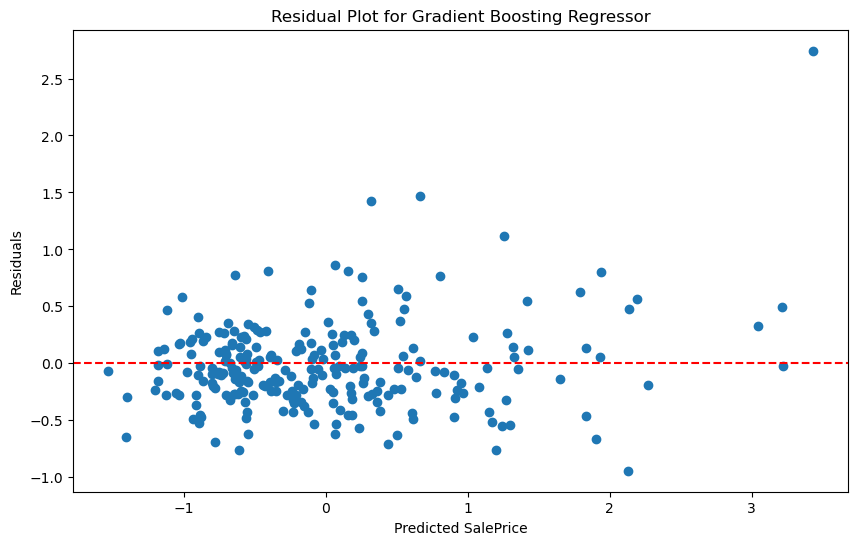

In [45]:
draw_actual_predicted(y_test.ravel(), y_pred_gb, 'Gradient Boosting Regressor')
draw_residual(y_test.ravel(), y_pred_gb, 'Gradient Boosting Regressor')

### Partial Least Squares Regression <a class="anchor" id="partial-least-squares-regression"></a>

In [46]:
from sklearn.cross_decomposition import PLSRegression

# Create a Partial Least Squares Regression model
pls_model = PLSRegression(n_components=2)

# Train the model on the scaled training data
pls_model.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred_pls = pls_model.predict(X_test)

mse_pls = metrics.mean_squared_error(y_test, y_pred_pls)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_pls))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_pls))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pls)))

MAE: 0.33292878559619266
MSE: 0.23131666330514306
RMSE: 0.48095390975138463


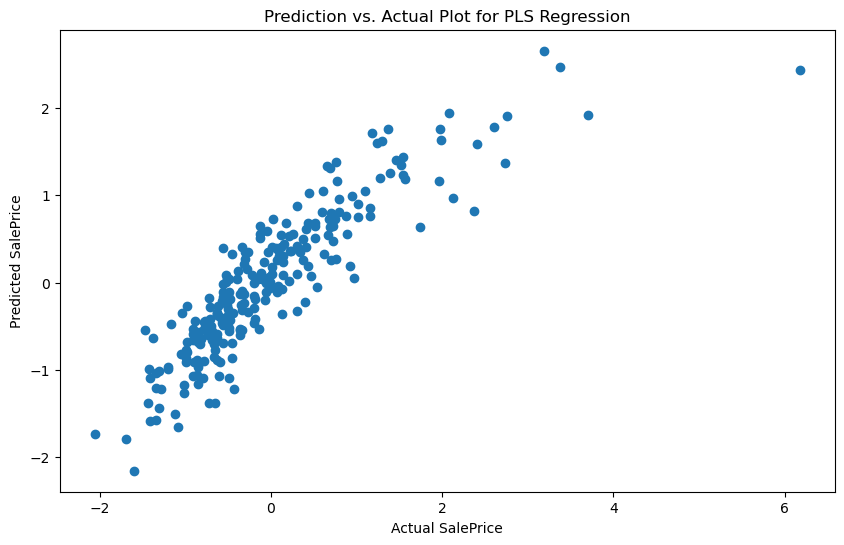

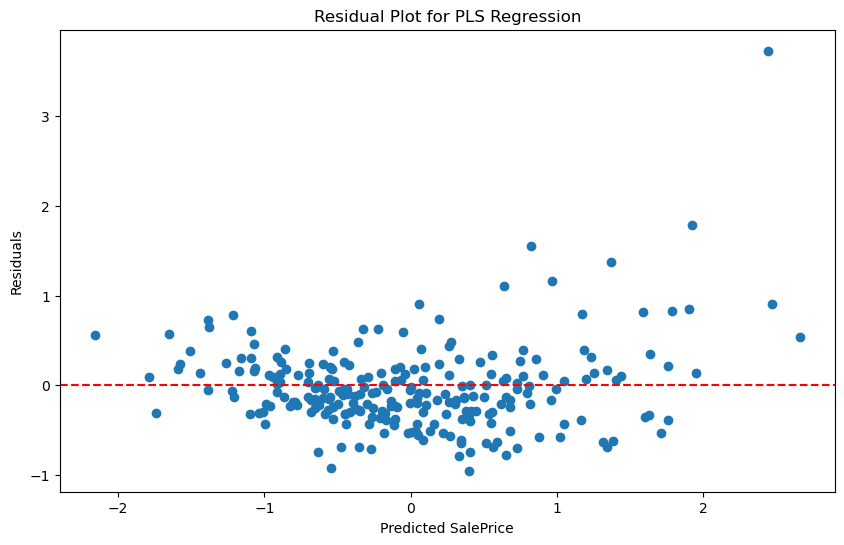

In [47]:
draw_actual_predicted(y_test, y_pred_pls, 'PLS Regression')
draw_residual(y_test, y_pred_pls, 'PLS Regression')

### Support Vector Regression <a class="anchor" id="support-vector-regression"></a>

In [48]:
from sklearn.svm import SVR

# Create a Support Vector Regression model
svr_model = SVR(kernel='linear')  # You can also try 'rbf' or 'poly' kernels

# Train the model on the scaled training data
svr_model.fit(X_train, y_train.ravel())

# Make predictions on the scaled test data
y_pred_svr = svr_model.predict(X_test)

mse_svr = metrics.mean_squared_error(y_test, y_pred_svr)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_svr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

MAE: 0.2942845409113752
MSE: 0.20159745406720977
RMSE: 0.4489960512824247


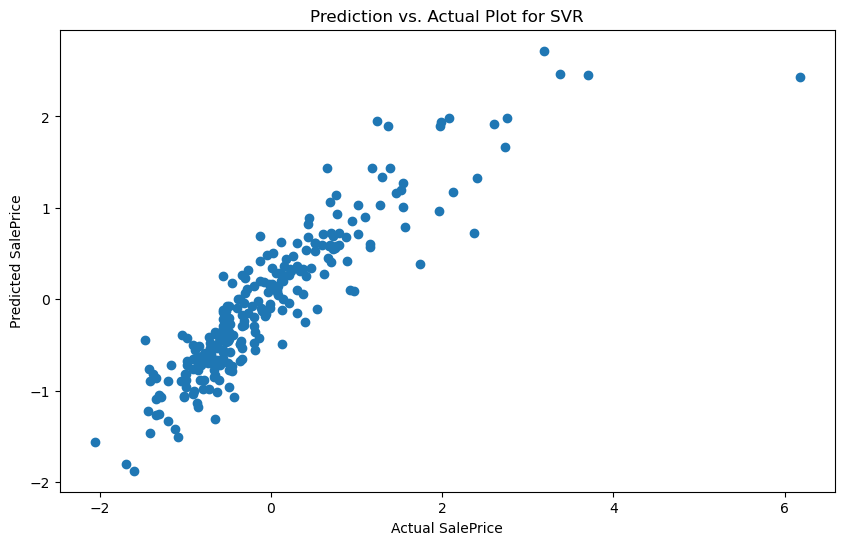

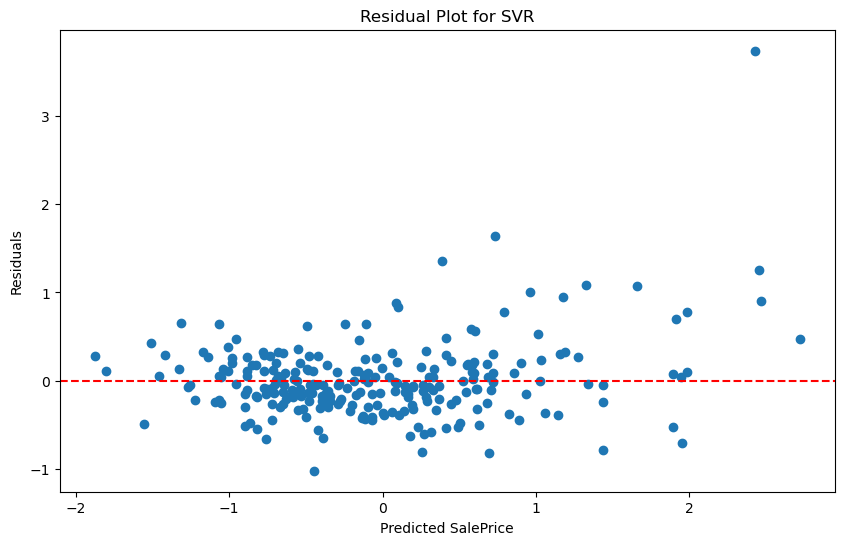

In [49]:
draw_actual_predicted(y_test.ravel(), y_pred_svr, 'SVR')
draw_residual(y_test.ravel(), y_pred_svr, 'SVR')

### Ridge Regression <a class="anchor" id="ridge-regression"></a>

In [50]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)

# Train the model on the scaled training data
ridge_model.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = metrics.mean_squared_error(y_test, y_pred_ridge)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

MAE: 0.30217376719566996
MSE: 0.1966339033568015
RMSE: 0.44343421536548294


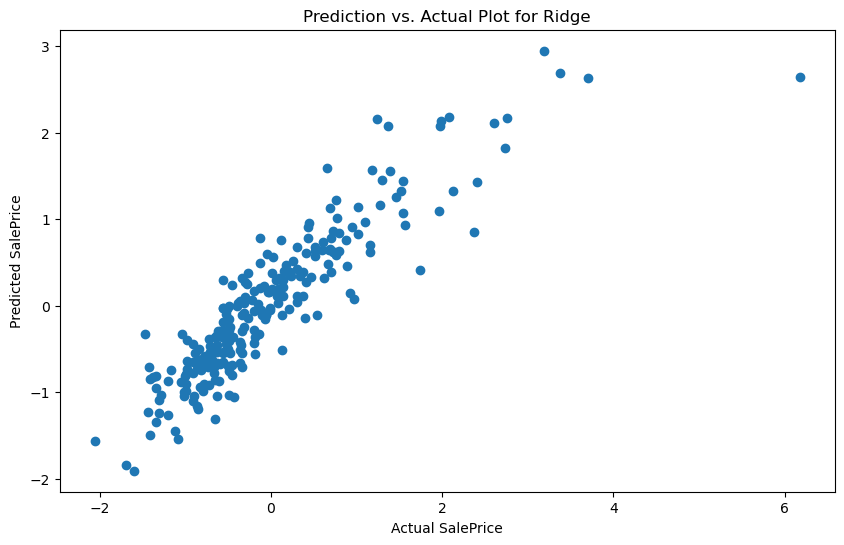

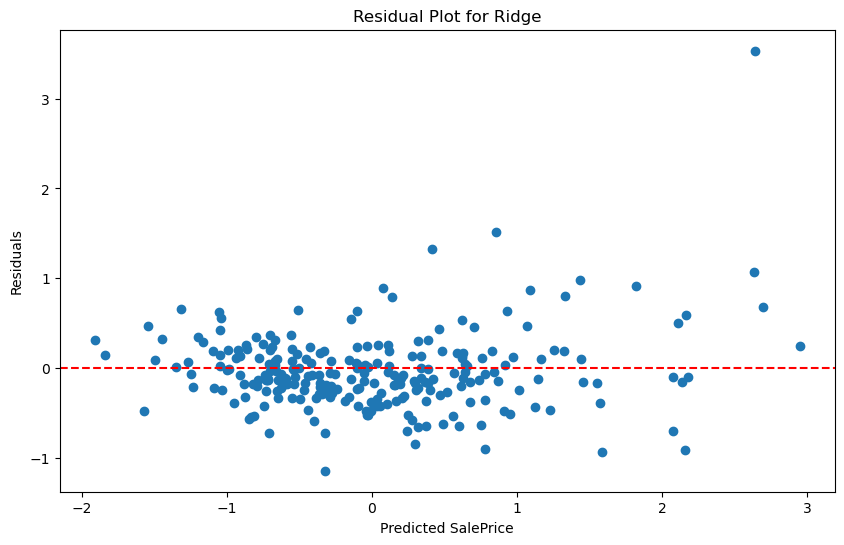

In [51]:
draw_actual_predicted(y_test, y_pred_ridge, 'Ridge')
draw_residual(y_test, y_pred_ridge, 'Ridge')

### XGBoost <a class="anchor" id="xgboost"></a>

In [52]:
import xgboost as xgb
# Create an XGBoost Regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the scaled training data
xgb_model.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

MAE: 0.27588423583775223
MSE: 0.1434000981702973
RMSE: 0.3786820541962575


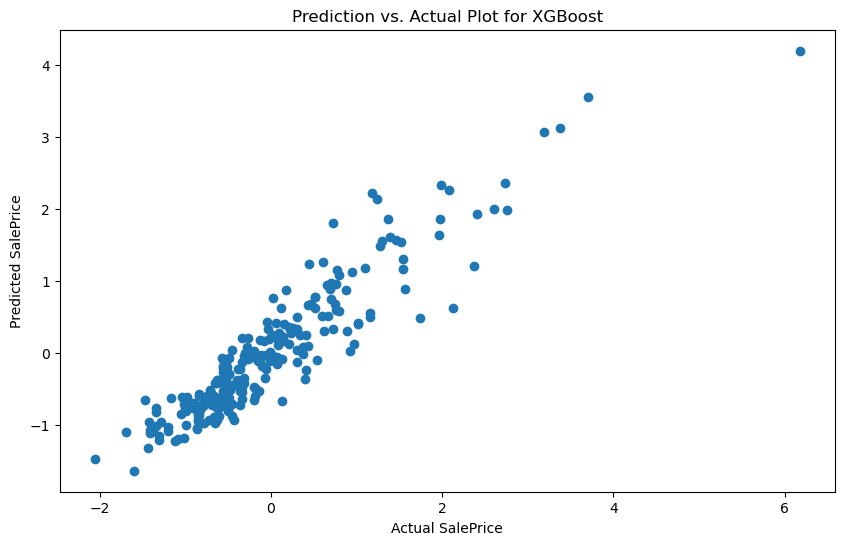

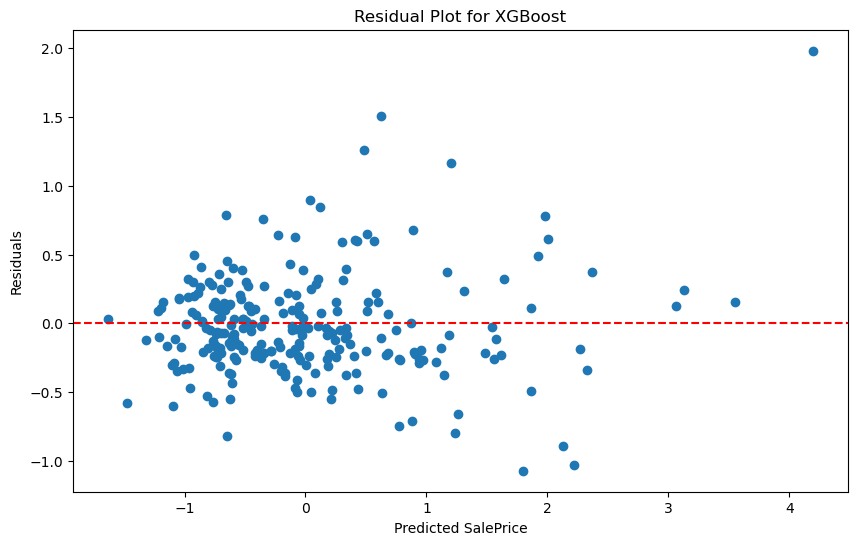

In [53]:
draw_actual_predicted(y_test.ravel(), y_pred_xgb, 'XGBoost')
draw_residual(y_test.ravel(), y_pred_xgb, 'XGBoost')

## Model Evaluation <a class="anchor" id="model-evaluation"></a>

In this section, we evaluate the performance of various regression models using the Mean Squared Error (MSE) metric. The MSE measures the average squared difference between predicted and actual values, with lower values indicating better model performance.

We have considered the following regression models for evaluation:
- Linear Regression
- Random Forest
- Gradient Boosting
- Partial Least Squares (PLS)
- Support Vector Regression (SVR)
- Ridge Regression
- XGBoost

The bar plot below displays the sorted MSE scores for each model. A lower MSE score indicates a better fit to the data. This plot allows us to compare the relative performance of the different regression models.

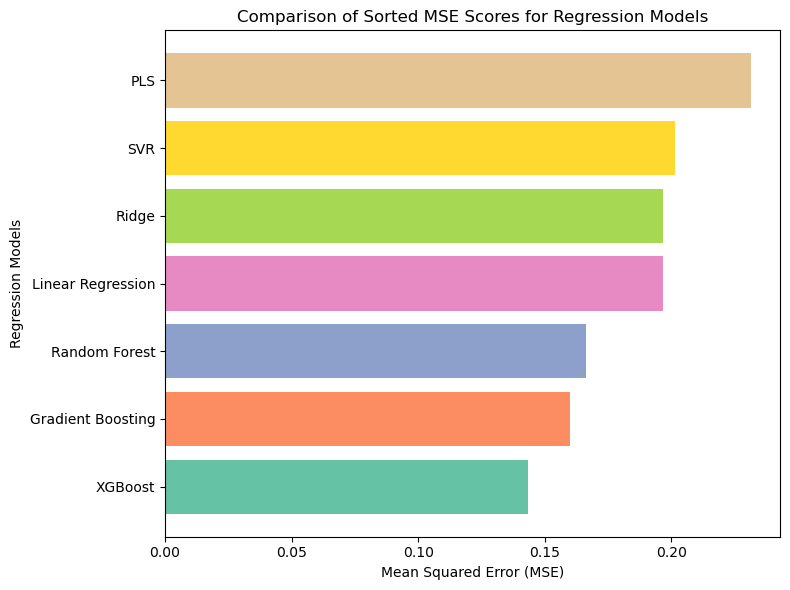

In [54]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'PLS', 'SVR', 'Ridge', 'XGBoost']

# Replace these with actual MSE scores for each model
mse_scores = [mse_lr, mse_rf, mse_gb, mse_pls, mse_svr, mse_ridge, mse_xgb]

sorted_indices = np.argsort(mse_scores)
sorted_models = [models[i] for i in sorted_indices]
sorted_mse_scores = [mse_scores[i] for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.barh(sorted_models, sorted_mse_scores, color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494'])
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Regression Models')
plt.title('Comparison of Sorted MSE Scores for Regression Models')


plt.tight_layout()
plt.show()

From the plot, we can observe which model performed best in terms of minimizing the MSE, helping us make an informed choice for our regression task.

In summary, XGBoost stands out as the top-performing model in terms of minimizing MSE, closely followed by Gradient Boosting and Random Forest. These models demonstrate the importance of ensemble techniques and advanced algorithms in achieving accurate regression predictions. Depending on your specific requirements, any of these three models could be a strong choice for your regression task.


## Conclusion <a class="anchor" id="conclusion"></a>
In this project, we embarked on a journey to explore and predict house prices using advanced regression techniques. 

In conclusion, this project allowed us to gain valuable experience in data preprocessing, exploratory data analysis, feature engineering, and regression modeling. We've learned that selecting the right algorithm is crucial, and ensemble methods like XGBoost can provide outstanding predictive power. The insights gained here can be applied to real-world scenarios where regression tasks require accurate predictions. As we close this chapter, we look forward to applying these skills to future data analysis projects and continuing our journey in the world of data science.


## References

1. Kaggle Dataset: [**House Prices - Advanced Regression Techniques Dataset**](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
2. Heading Photo: [**Housing Housing crisis: how industry can help | World Economic Forum**](https://www.weforum.org/agenda/2020/01/closing-the-housing-gap-how-industry-can-help/)

**Project Author**: Fahri Burak NEBIOGLU <br>
**Date**: 04.09.2023
